# The Transformation and Accept/Reject (aka. Von Neumann) methods 
Python notebook with exercise on how to generate random numbers following a specific PDF using uniformly distributed random numbers, in this case three different functions, each with their own challenge.

Both the Accept-Reject (Von Neumann) and transformation method should be considered for the problem (or a combination of both!):
- Transformation method (if function can be integrated and then inverted).
- Accept-Reject (or Hit & Miss) method (by Ulam Stanislav and John Von Neumann).

### References:
- G. Cowan: Chapter 3
- P. R. Bevington: page 81-84
- __[40. Monte Carlo Techniques PDG](https://pdg.lbl.gov/2023/reviews/rpp2023-rev-monte-carlo-techniques.pdf)__

### Authors: 
- Troels C. Petersen (Niels Bohr Institute)

### Date:    
- 04-12-2023 (latest update)

***

In [1]:
import numpy as np                                     # Matlab like syntax for linear algebra and functions
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Modules to see files and folders in directories
from scipy import stats

Load external functions:

In [2]:
sys.path.append('../../External_Functions')
from ExternalFunctions import Chi2Regression, BinnedLH, UnbinnedLH
from ExternalFunctions import nice_string_output, add_text_to_ax    # Useful functions to print fit results on figure

plt.rcParams['font.size'] = 18     # Set some basic plotting parameters

Set the parameters of the program:

In [7]:
r = np.random
r.seed(42)

save_plots = False  
N_points = 10000    # Number of random points to be generated

In [98]:
def accept_reject(func, x_bound, y_bound, samples):
    x = np.random.uniform(*x_bound, size = samples)
    y = np.random.uniform(*y_bound, size = samples)
    
    sampled = x[func(x) > y]
    return sampled

## Problem 1: 

#### Produce random points following $f(x) \sim \exp(-x/3), x \in [0, \infty]$.

Here we can use transformation sampling. 

We get U =  exp(-x/3)

-> x = - 3 * ln(U )

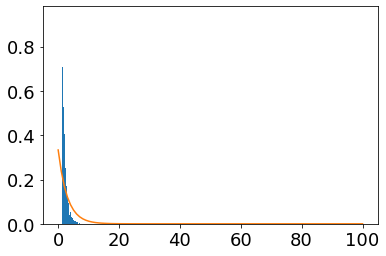

In [194]:
def test1(x):
    return np.exp(-x/3) / 3

bins = 100
N1 = 10_000
xmin = 0
xmax = 20

norm = N1 * (xmax-xmin) / bins

p1 = lambda U: - np.log(U/3)
U1 = r.uniform(size = N1)
x1 = p1(U1) 
#test = accept_reject(test1, x_bound = [0, 1e2], y_bound = [0, 1], samples = 1_000_000)


plt.hist(x1, bins = bins, density = True)
#plt.hist(test, bins = 100, alpha = 0.5, density = True)

plt.plot(np.linspace(0,100,100), test1(np.linspace(0,100,100)))

plt.show()


And to make sure that we have computed the points correctly, we plot a histogram of the data:

## Problem 2: 

#### Produce random points following $g(x) \sim x \cos(x), x \in [0, \frac{\pi}{2}]$.

 G = intergral(x^2 * cos^2(x))[0, pi/2]
 
 G = 1/48 π (-6 + π^2) = 0.25
 
 and so to normalize we need g_norm = g * 2

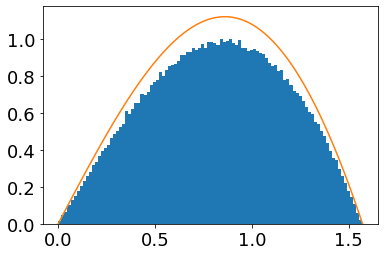

In [133]:
xmin2, xmax2 = 0, np.pi/2         # Note the simple/short notation.
def g(x):
    return x * np.cos(x)


p2 = accept_reject(g, [xmin2, xmax2], [0, 1], 1_000_000)
plt.hist(p2, bins = 100, density = True)
plt.plot(np.linspace(xmin2, xmax2, 100), 2 * g(np.linspace(xmin2, xmax2, 100)))

plt.show()

## Problem 3: 

#### Produce random points following $h(x) \sim \exp(-x/3)\cos(x)^2$ in the interval $[0, \infty]$ and estimate the integral of $h(x)$ in the defined range.

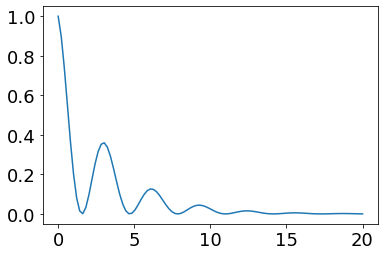

In [137]:
def h(x):
    return np.exp(-x/3) * np.cos(x)**2
X = np.linspace(0, 20, 100)
plt.plot(X, h(X))
plt.show()


In [138]:
x_exp = p1(U1)

# Learning points:

While you should by now be able to solve problem 1+2 with at least one of the methods, problem 3 is harder, and requires the combination of the two. Solving this exercise should make you:
1. "proficient" in using the two standard methods.
2. capable of getting random numbers according to ALL 1D PDFs, bounded/integrable/invertible or not.

The last point of problem 3 should also illustrate, how you can estimate integrals using this method.